<a href="https://colab.research.google.com/github/sdavarzani/2-Dimensional-Gaussian-Filtering-/blob/main/Gaussian_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Importing libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io
import math
from scipy import signal

# *Gaussian Filtering*

**Gaussian 1D**

In [ ]:
def gauss1d(sigma):
    size= np.ceil(sigma*6)  #1D array with length 6 times sigma rounded up to the next odd integer for the lenght of the filter
    if (size%2 == 0):
        size= np.ceil(size) // 2 * 2 + 1

    filter_range= np.arange(-(size/2),(size/2)+1)  # Defining the final range of the filter
    gaussian_filter = [(np.exp(-(x**2)/(2*sigma**2))) for x in filter_range]
    normalized_filter= gaussian_filter /np.sum(gaussian_filter)  #Normalization
    return normalized_filter


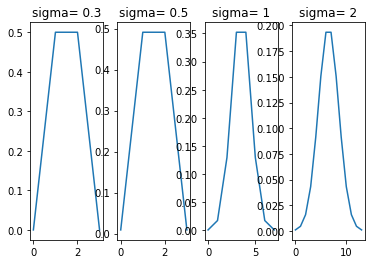

In [ ]:
fig,ax = plt.subplots(1,4)
ax[0].plot(gauss1d(sigma=0.3))
ax[0].set_title(f'sigma= {0.3}')
ax[1].plot(gauss1d(sigma=0.5))
ax[1].set_title(f'sigma= {0.5}')
ax[2].plot(gauss1d(sigma=1))
ax[2].set_title(f'sigma= {1}')
ax[3].plot(gauss1d(sigma=2))
ax[3].set_title(f'sigma= {2}')
plt.show()

In [ ]:
print(gauss1d(0.3))
print()
print(gauss1d(0.5))
print()
print(gauss1d(1))
print()
print(gauss1d(2))
print()

[7.47255758e-06 4.99992527e-01 4.99992527e-01 7.47255758e-06]

[0.0089931 0.4910069 0.4910069 0.0089931]

[0.00087271 0.01752886 0.12952176 0.35207666 0.35207666 0.12952176
 0.01752886 0.00087271]

[0.00101494 0.00454863 0.01587627 0.04315617 0.09136162 0.15062984
 0.19341254 0.19341254 0.15062984 0.09136162 0.04315617 0.01587627
 0.00454863 0.00101494]



**Gaussian 2D**

In [ ]:
def gauss2d(sigma):
  gauss2d= gauss1d(sigma)
  gauss2d =gauss2d[np.newaxis] # Converting 1D array to 2D array
  gauss2d_trans=  gauss2d.T # Transpose of 2D array
  convolution= signal.convolve2d(gauss2d,gauss2d_trans)
  sum_array=np.sum(convolution, dtype = np.float32)
  gauss2d_final=convolution/sum_array
  return(gauss2d_final)


In [ ]:
print(gauss2d(0.5))
print()
print(gauss2d(1))
print()

[[8.08759372e-05 4.41567655e-03 4.41567655e-03 8.08759372e-05]
 [4.41567655e-03 2.41087771e-01 2.41087771e-01 4.41567655e-03]
 [4.41567655e-03 2.41087771e-01 2.41087771e-01 4.41567655e-03]
 [8.08759372e-05 4.41567655e-03 4.41567655e-03 8.08759372e-05]]

[[7.61624117e-07 1.52976293e-05 1.13035041e-04 3.07261099e-04
  3.07261099e-04 1.13035041e-04 1.52976293e-05 7.61624117e-07]
 [1.52976293e-05 3.07261099e-04 2.27036949e-03 6.17150414e-03
  6.17150414e-03 2.27036949e-03 3.07261099e-04 1.52976293e-05]
 [1.13035041e-04 2.27036949e-03 1.67758876e-02 4.56015903e-02
  4.56015903e-02 1.67758876e-02 2.27036949e-03 1.13035041e-04]
 [3.07261099e-04 6.17150414e-03 4.56015903e-02 1.23957974e-01
  1.23957974e-01 4.56015903e-02 6.17150414e-03 3.07261099e-04]
 [3.07261099e-04 6.17150414e-03 4.56015903e-02 1.23957974e-01
  1.23957974e-01 4.56015903e-02 6.17150414e-03 3.07261099e-04]
 [1.13035041e-04 2.27036949e-03 1.67758876e-02 4.56015903e-02
  4.56015903e-02 1.67758876e-02 2.27036949e-03 1.13035041e-

In [ ]:
img_o = Image.open('/content/dog.jpg')
imgGray = img_o.convert('L')

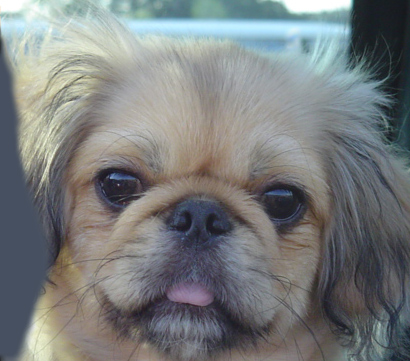

Original Image


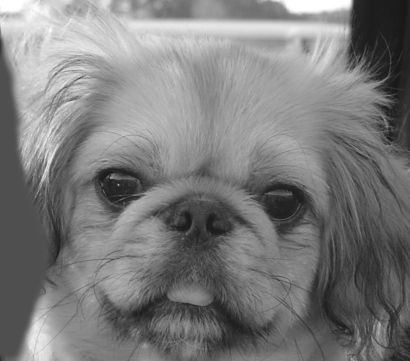

GreyScale Image


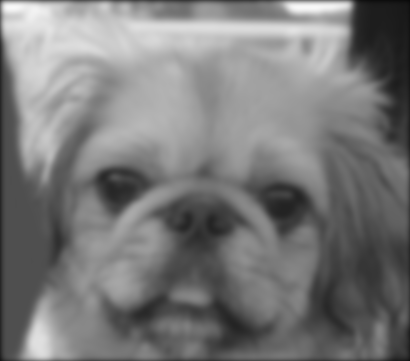

Gaussian Filtered Greyscale Image


In [ ]:
img_o.show()            # Original Image
print('Original Image')
imgGray.show()                                       # GreyScale Image
print('GreyScale Image')
#
Gaussian = gaussconvolve2d(imgGray,3)
dog_filtred=Image.fromarray((Gaussian).astype(np.float32))
dog_filtred.show()
print('Gaussian Filtered Greyscale Image')               # Gaussian Filtered Greyscale Image